In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import sys
sys.path.append(os.path.abspath('/content/gdrive/My Drive/Thesis'))

In [36]:
df = pd.read_csv("gdrive/MyDrive/Thesis/csv/en_climate_monthly_AB_3050520_1887-1995_P1M.csv")

In [ ]:
#list(df.columns)

In [38]:
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-115.57,51.18,BANFF,3050520,1887-01,1887,1,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-115.57,51.18,BANFF,3050520,1887-02,1887,2,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-115.57,51.18,BANFF,3050520,1887-03,1887,3,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,-115.57,51.18,BANFF,3050520,1887-04,1887,4,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
4,-115.57,51.18,BANFF,3050520,1887-05,1887,5,NaN,NaN,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#data = df[["Date/Time", "Mean Max Temp (°C)"]].copy()
data = df.copy()

In [40]:
data.columns = ["x", "y", "station", "climateID", "date_time",
                                              "year", "month", "mean_MAX_temp_C", "mean_MAX_temp_FLAG",
                                              "mean_MIN_temp_C", "mean_MIN_temp_FLAG", "MEAN_TEMP_C",
                                              "MEAN_TEMP_FLAG", "extr_MAX_temp_C", "extr_MAX_temp_FLAG",
                                              "extr_MIN_temp_C", "extr_MIN_temp_FLAG", "total_rain_mm",
                                              "total_rain_FLAG", "total_snow_cm", "total_snow_FLAG", 
                                              "total_precip_mm", "total_precip_FLAG", "snow_ground_last_day_cm",
                                              "snow_ground_FLAG", "dir_max_gust", "dir_max_gust_FLAG",
                                              "speed_max_gust_km_h", "speed_max_gust_FLAG"]


In [ ]:
#data.head()

In [41]:
data = data[~(data['date_time'] < '1900-01-01')]

In [42]:
data = data.drop(["x", "y", "station", "year", "month", "mean_MAX_temp_FLAG", "mean_MIN_temp_FLAG", "MEAN_TEMP_FLAG", 
                  "extr_MAX_temp_FLAG", "extr_MIN_temp_FLAG", "total_rain_FLAG", 
                  "total_snow_FLAG", "total_precip_FLAG", "snow_ground_FLAG", 
                  "dir_max_gust_FLAG", "speed_max_gust_FLAG", "climateID", "snow_ground_last_day_cm", 
                  "dir_max_gust", "speed_max_gust_km_h"],axis=1)

In [43]:
data.head()

,date_time,mean_MAX_temp_C,mean_MIN_temp_C,MEAN_TEMP_C,extr_MAX_temp_C,extr_MIN_temp_C,total_rain_mm,total_snow_cm,total_precip_mm
157,1900-02,-3.3,-14.7,-9.0,5.6,-36.7,0.0,16.5,16.5
158,1900-03,3.4,-8.1,-2.4,12.8,-25.6,25.1,42.9,68.1
159,1900-04,11.9,-1.3,5.3,21.7,-5.6,19.3,18.5,37.8
160,1900-05,16.2,1.3,8.8,20.6,-2.8,22.1,0.0,22.1
161,1900-06,20.4,5.4,12.9,29.4,-2.2,118.1,0.0,118.1


In [44]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_MAX_temp_C,1129.0,8.518689,9.913528,-20.6,-0.2,9.3,17.20,26.6
mean_MIN_temp_C,1129.0,-3.685474,8.032294,-32.6,-10.1,-2.2,3.40,9.6
MEAN_TEMP_C,1129.0,2.419575,8.932659,-26.6,-5.2,3.5,10.30,17.9
extr_MAX_temp_C,1125.0,17.446222,9.459611,-7.2,8.3,18.3,26.10,34.4
extr_MIN_temp_C,1125.0,-14.470133,13.364296,-51.1,-26.1,-10.6,-2.20,5.0
total_rain_mm,1127.0,23.400355,28.514200,0.0,0.8,11.4,36.80,152.7
total_snow_cm,1127.0,17.791571,21.487184,0.0,0.0,11.7,26.85,157.0
total_precip_mm,1127.0,39.491748,27.123389,0.0,20.1,32.5,52.30,193.8


In [45]:
#data[data == np.inf].count()
# drop rows with all zeros
data = data.loc[(df!=0).any(1)]

<ipython-input-45-7e55de5b4286>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data.loc[(df!=0).any(1)]


In [46]:
#data.isna().sum().sum()
data = data.dropna()

In [47]:
data.isna().sum()

date_time          0
mean_MAX_temp_C    0
mean_MIN_temp_C    0
MEAN_TEMP_C        0
extr_MAX_temp_C    0
extr_MIN_temp_C    0
total_rain_mm      0
total_snow_cm      0
total_precip_mm    0
dtype: int64

In [48]:
data.shape

(1125, 9)

In [49]:
data["date_time"] = pd.to_datetime(data["date_time"])
data.set_index(data["date_time"], inplace=True)
data.drop("date_time", axis=1, inplace=True)

In [50]:
cleaned_data = data

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [51]:
weather_y = cleaned_data.pop("MEAN_TEMP_C")
weather_x = cleaned_data

In [52]:
print(weather_y.shape)
print(weather_x.shape)

(1125,)
(1125, 7)


In [63]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.3,random_state=4, shuffle=False)

In [79]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(787, 7)
(787,)
(338, 7)
(338,)


In [81]:
weather_y

date_time
1900-02-01    -9.0
1900-03-01    -2.4
1900-04-01     5.3
1900-05-01     8.8
1900-06-01    12.9
              ... 
1994-11-01    -6.0
1994-12-01    -8.8
1995-01-01    -9.5
1995-02-01    -6.3
1995-03-01    -3.0
Name: MEAN_TEMP_C, Length: 1125, dtype: float64

In [112]:
regr=RandomForestRegressor(random_state=0,max_depth=10)

In [113]:
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [114]:
prediction=regr.predict(test_X)
np.mean(np.absolute(prediction-test_y))

0.13955097883104156

In [115]:
prediction.shape

(338,)

In [116]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 1.00


In [117]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
results = pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

In [118]:
results

,Actual,Prediction,diff
date_time,,,
1967-02-01,-4.2,-4.08,-0.12
1967-03-01,-6.6,-6.61,0.01
1967-04-01,0.2,0.37,-0.17
1967-05-01,6.3,6.15,0.15
1967-06-01,11.7,11.70,0.00
...,...,...,...
1994-11-01,-6.0,-6.00,0.00
1994-12-01,-8.8,-8.97,0.17
1995-01-01,-9.5,-9.38,-0.12


In [119]:
res_sorted = results.sort_values(by="date_time")

In [120]:
res_sorted

,Actual,Prediction,diff
date_time,,,
1967-02-01,-4.2,-4.08,-0.12
1967-03-01,-6.6,-6.61,0.01
1967-04-01,0.2,0.37,-0.17
1967-05-01,6.3,6.15,0.15
1967-06-01,11.7,11.70,0.00
...,...,...,...
1994-11-01,-6.0,-6.00,0.00
1994-12-01,-8.8,-8.97,0.17
1995-01-01,-9.5,-9.38,-0.12


Text(0, 0.5, 'Temperature (C)')

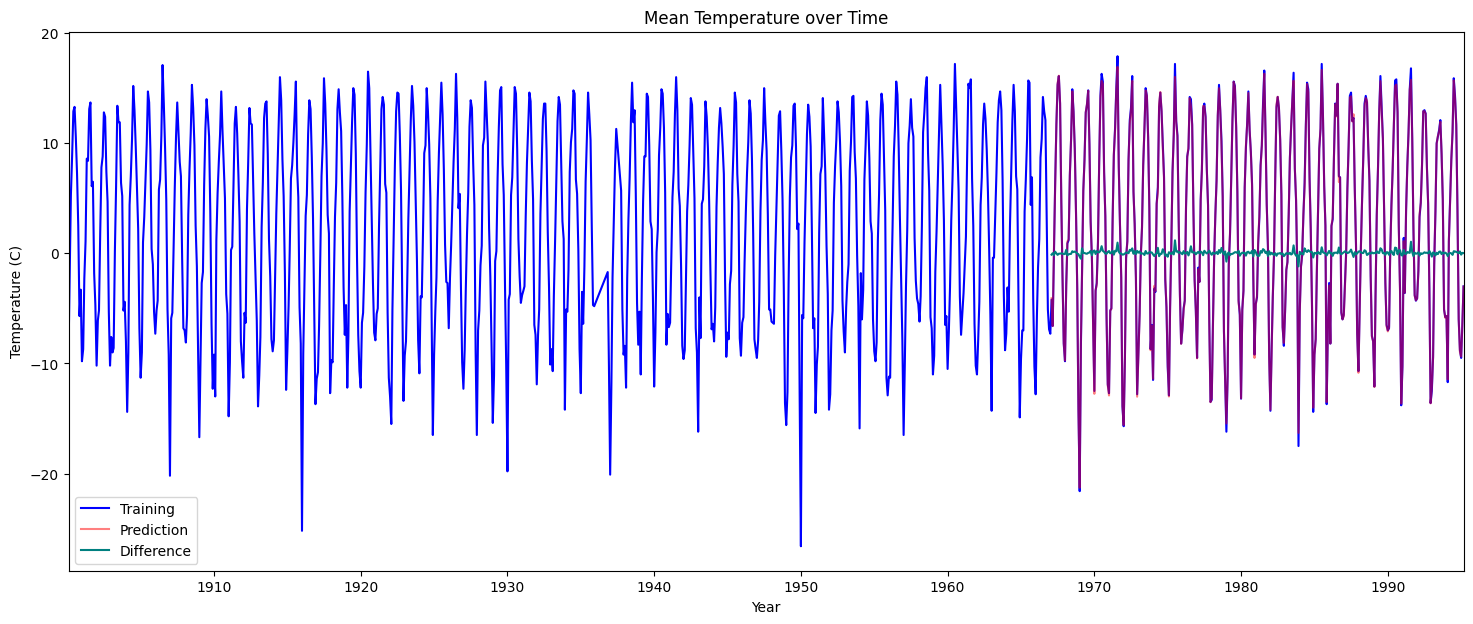

In [121]:
plt.figure(figsize = (18,7))
plt.plot(weather_y, label="Training", color="blue")
#plt.plot(res_sorted['Actual'], label="Actual", alpha=0.5, color="blue")
plt.plot(res_sorted['Prediction'], label="Prediction", alpha=0.5, color="red")
plt.plot(res_sorted['diff'], label='Difference', color="teal")
#plt.plot(prediction3, label = "Prediction")
#plt.grid(alpha=0.5)
plt.legend()
plt.margins(x=0)
plt.title("Mean Temperature over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

In [88]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.04
R2-score: 1.00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=20,
                                                   n_estimators=1000,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                   random_state=42, verbose=2)

In [ ]:
prediction4=rf_random.predict(test_X)
np.mean(np.absolute(prediction4-test_y))

0.1297217694787979

In [ ]:
print('Variance score: %.2f' % rf_random.score(test_X, test_y))

Variance score: 1.00


In [89]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
ada_regr=RandomForestRegressor(random_state=0, n_estimators=100)

In [103]:
ada_regr.fit(train_X,train_y)

RandomForestRegressor(random_state=0)

In [104]:
ada_prediction=ada_regr.predict(test_X)
np.mean(np.absolute(ada_prediction-test_y))

0.13881656804733783

In [105]:
for i in range(len(ada_prediction)):
  ada_prediction[i]=round(ada_prediction[i],2)
ada_results = pd.DataFrame({'Actual':test_y,'Prediction':ada_prediction,'diff':(test_y-ada_prediction)})

In [106]:
ada_res_sorted = ada_results.sort_values(by="date_time")

In [107]:
ada_res_sorted

,Actual,Prediction,diff
date_time,,,
1967-02-01,-4.2,-4.09,-0.11
1967-03-01,-6.6,-6.56,-0.04
1967-04-01,0.2,0.36,-0.16
1967-05-01,6.3,6.17,0.13
1967-06-01,11.7,11.72,-0.02
...,...,...,...
1994-11-01,-6.0,-6.04,0.04
1994-12-01,-8.8,-8.97,0.17
1995-01-01,-9.5,-9.38,-0.12


Text(0, 0.5, 'Temperature (C)')

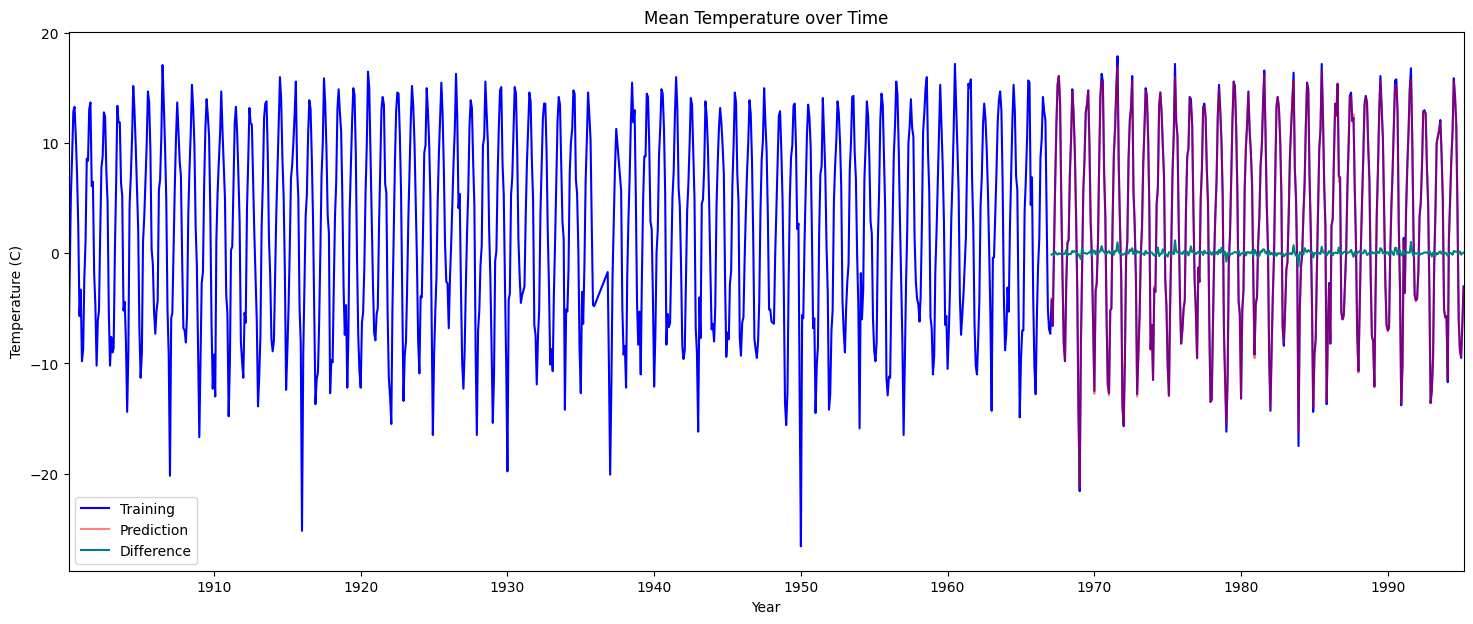

In [108]:
plt.figure(figsize = (18,7))
plt.plot(weather_y, label="Training", color="blue")
plt.plot(ada_res_sorted['Prediction'], label="Prediction", alpha=0.5, color="red")
plt.plot(ada_res_sorted['diff'], label='Difference', color="teal")
#plt.plot(prediction3, label = "Prediction")
#plt.grid(alpha=0.5)
plt.legend()
plt.margins(x=0)
plt.title("Mean Temperature over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")